# Assessing Fit (polynomial regression)

In this notebook we will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic

We will continue to use the House data from previous notebooks.

#### Fire up graphlab create

In [1]:
import graphlab

# Polynomial_sframe function

create an SFrame consisting of the powers of an SArray up to a specific degree:

In [2]:
def polynomial_sframe(feature, degree):
    poly_sframe = graphlab.SFrame()
    
    poly_sframe['power_1'] = feature

    if degree > 1:
        
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            arrray = feature.apply(lambda x: x**power)
            poly_sframe[name] = arrray

    return poly_sframe

testing the polynomial_sframe function

In [3]:
tmp = graphlab.SArray([1., 2., 3.])
print polynomial_sframe(tmp, 3)

This non-commercial license of GraphLab Create for academic use is assigned to mahmoudtarrasse@gmail.com and will expire on March 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\mahmoud\AppData\Local\Temp\graphlab_server_1494162308.log.0


+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualizing polynomial regression

In [4]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [5]:
sales = sales.sort(['sqft_living', 'price'])

#### columns of the dataset

In [6]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875,1,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801,1,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000,1,0
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444,1,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900,1,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000,1,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636,1,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298,1,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720,1,0
8658300340,2014-05-23 00:00:00+00:00,80000.0,1.0,0.75,430.0,5050,1,0


#### number of the records in the data set

In [7]:
print len(sales)

21613


In [8]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] 

In [9]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None, verbose=False)

In [10]:
model1.get("coefficients")

name,index,value,stderr
(intercept),None,-43579.0852515,4402.68969743
power_1,None,280.622770886,1.93639855513


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

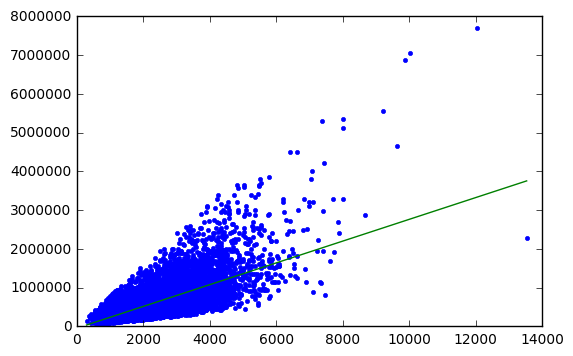

In [12]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

In [13]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None, verbose=False)

In [14]:
model2.get("coefficients")

name,index,value,stderr
(intercept),None,199222.496445,7058.00483552
power_1,None,67.9940640677,5.28787201316
power_2,None,0.0385812312789,0.000898246547032


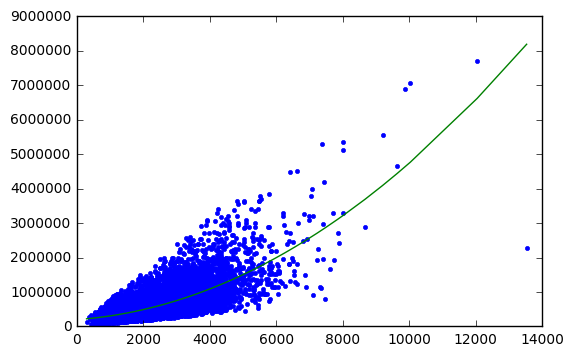

In [15]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [16]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_features = poly3_data.column_names() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = poly3_features, validation_set = None, verbose= False)

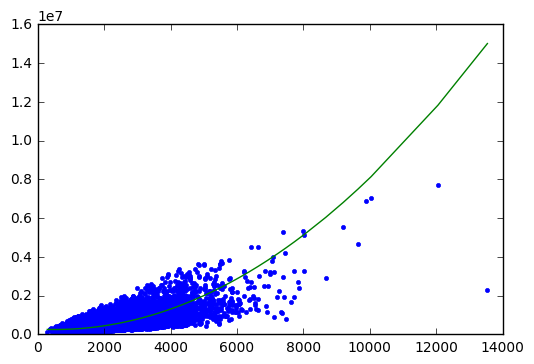

In [17]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly2_data),'-')

Now try a 15th degree polynomial:

In [18]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = poly15_features, validation_set = None, verbose=False)

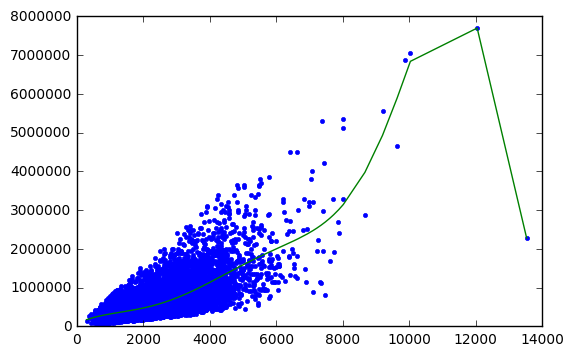

In [19]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

In [20]:
model15.get("coefficients")[15]

{'index': None,
 'name': 'power_15',
 'stderr': nan,
 'value': 1.3988169085700244e-54}

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

#### spltting the data ser into 4 equal size sets

In [21]:
(temp_1, temp_2) = sales.random_split(0.5, seed=0)
set_1, set_2 = temp_1.random_split(0.5, seed=0)
set_3, set_4 = temp_2.random_split(0.5, seed=0)

#### Fitting a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [22]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = poly15_features, validation_set = None, verbose=False)

In [23]:
poly_15_1_data = polynomial_sframe(set_1['sqft_living'], 15)
poly_15_2_data = polynomial_sframe(set_2['sqft_living'], 15)
poly_15_3_data = polynomial_sframe(set_3['sqft_living'], 15)
poly_15_4_data = polynomial_sframe(set_4['sqft_living'], 15)

poly_15_1_features = poly_15_1_data.column_names()
poly_15_2_features = poly_15_2_data.column_names()
poly_15_3_features = poly_15_3_data.column_names()
poly_15_4_features = poly_15_4_data.column_names()


poly_15_1_data['price'] = set_1['price']
poly_15_2_data['price'] = set_2['price']
poly_15_3_data['price'] = set_3['price']
poly_15_4_data['price'] = set_4['price']

#### trainning for models on the 4 small datasets

In [24]:
model_15_1 = graphlab.linear_regression.create(poly_15_1_data, verbose=False, target = 'price', features = poly_15_1_features, validation_set = None)
model_15_2 = graphlab.linear_regression.create(poly_15_2_data, verbose=False, target = 'price', features = poly_15_2_features, validation_set = None)
model_15_3 = graphlab.linear_regression.create(poly_15_3_data, verbose=False, target = 'price', features = poly_15_3_features, validation_set = None)
model_15_4 = graphlab.linear_regression.create(poly_15_4_data, verbose=False, target = 'price', features = poly_15_4_features, validation_set = None)

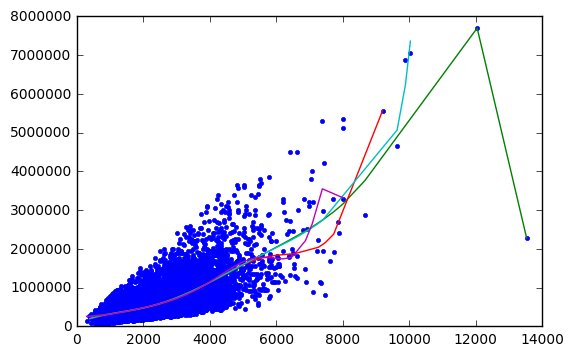

In [25]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.')

plt.plot(poly_15_1_data['power_1'], model_15_1.predict(poly_15_1_data),'-')

plt.plot(poly_15_2_data['power_1'], model_15_2.predict(poly_15_2_data),'-')

plt.plot(poly_15_3_data['power_1'], model_15_3.predict(poly_15_3_data),'-')

plt.plot(poly_15_4_data['power_1'], model_15_4.predict(poly_15_4_data),'-')

## observation:

###### every model of the 4 models is overfittefd on it's trainning set

# Selecting a Polynomial Degree

we will create a vallidation set as a subset of or data set and we only gonna use that ot assess the performance of the model degree 

the model will never see this set before the assessing

In [26]:
training_and_validation, testing = sales.random_split(0.9, seed=1)
training_set, validation_set = training_and_validation.random_split(0.5, seed=1)

function to compute the residual sum squares

In [27]:
def compute_RSS(model, validation):
    predections = model.predict(validation)
    error = validation['price'] - predections
    error_2 = error * error
    return error_2.sum()

In [28]:
# looping from degree 1 to 15
import numpy as np
min_rss = np.inf
min_degree = -1
for degree in range (1, 16):
    #creating the data Sframe
    data = polynomial_sframe(training_set['sqft_living'], degree)
    #getting the features
    poly_features = data.column_names()
    #adding the price 
    data['price'] = training_set['price']
    model = graphlab.linear_regression.create(data, target='price', features= poly_features, validation_set = None, verbose= False)
    #creating the sframe of the validation set 
    validation_data = polynomial_sframe(validation_set['sqft_living'], degree)
    validation_data['price'] = validation_set['price']
    
    RSS = compute_RSS(model, validation_data)
    if RSS < min_rss:
        min_rss = RSS
        min_degree = degree
        
    print "the {}th degree polynomial as RSS = {}".format(degree, RSS)
print "\n \nthe best degree = {}".format(min_degree)

the 1th degree polynomial as RSS = 6.76709775198e+14
the 2th degree polynomial as RSS = 6.07090530698e+14
the 3th degree polynomial as RSS = 6.16714574533e+14
the 4th degree polynomial as RSS = 6.09129230654e+14
the 5th degree polynomial as RSS = 5.99177138584e+14
the 6th degree polynomial as RSS = 5.89182477809e+14
the 7th degree polynomial as RSS = 5.91717038418e+14
the 8th degree polynomial as RSS = 6.01558237777e+14
the 9th degree polynomial as RSS = 6.12563853988e+14
the 10th degree polynomial as RSS = 6.21744288936e+14
the 11th degree polynomial as RSS = 6.27012012704e+14
the 12th degree polynomial as RSS = 6.27757914772e+14
the 13th degree polynomial as RSS = 6.24738503262e+14
the 14th degree polynomial as RSS = 6.19369705905e+14
the 15th degree polynomial as RSS = 6.13089202414e+14

 
the best degree = 6


In [29]:
train_data =  polynomial_sframe(training_set['sqft_living'], 6)
test_data = polynomial_sframe(testing['sqft_living'], 6)
features = train_data.column_names()
test_data['price'] = testing['price']
train_data['price'] = training_set['price']
model = graphlab.linear_regression.create(train_data, target = 'price', features = features, validation_set = None, verbose = False)
RSS = compute_RSS(model, test_data)
print RSS

1.25529337848e+14
